In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings 
warnings.filterwarnings("ignore") 

In [ ]:
# Reading the dataset
df=pd.read_csv("/content/drive/MyDrive/LoanExport.csv") # change the path to ur drive

In [ ]:
# checking for shape of the dataset
df.shape

(291451, 28)

In [ ]:
# looking at insights of the data
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


# EDA 

In [ ]:
# checking for datatype of the columns
print(f"Data types:\n{11 * '-'}")
print(f"{df.dtypes}\n")

Data types:
-----------
CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object



In [ ]:
# checking for null values
print(f"Sum of null values in each feature:\n{35 * '-'}")
print(f"{df.isnull().sum()}")

Sum of null values in each feature:
-----------------------------------
CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64


In [ ]:
# checking for columns
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [ ]:
# Checking for Duplicate Values
df.duplicated().sum()

0

In [ ]:
# checking at insights of the data
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [ ]:
# Changing  FirstPaymentDate and MaturityDate into date format
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'], format='%Y%m')

df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y%m')

# Numerical Data Analysis

In [ ]:
# Numerical Data Analysis
num_col = df.select_dtypes('int').columns


In [ ]:
# checking at insights of the Numerical Data
df[num_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,291451.0,708.936991,68.408791,0.0,675.0,717.0,753.0,849.0
MIP,291451.0,9.216685,12.648273,0.0,0.0,0.0,25.0,55.0
Units,291451.0,1.026022,0.202986,0.0,1.0,1.0,1.0,4.0
OCLTV,291451.0,76.960529,15.236154,0.0,70.0,80.0,90.0,110.0
DTI,291451.0,30.033453,13.203974,0.0,22.0,31.0,39.0,65.0
OrigUPB,291451.0,124940.387921,53657.440624,8000.0,83000.0,117000.0,160000.0,497000.0
LTV,291451.0,76.937986,15.225298,0.0,70.0,80.0,90.0,103.0
OrigLoanTerm,291451.0,359.835375,2.286939,301.0,360.0,360.0,360.0,361.0
EverDelinquent,291451.0,0.197848,0.398378,0.0,0.0,0.0,0.0,1.0
MonthsDelinquent,291451.0,1.837729,8.809392,0.0,0.0,0.0,0.0,180.0


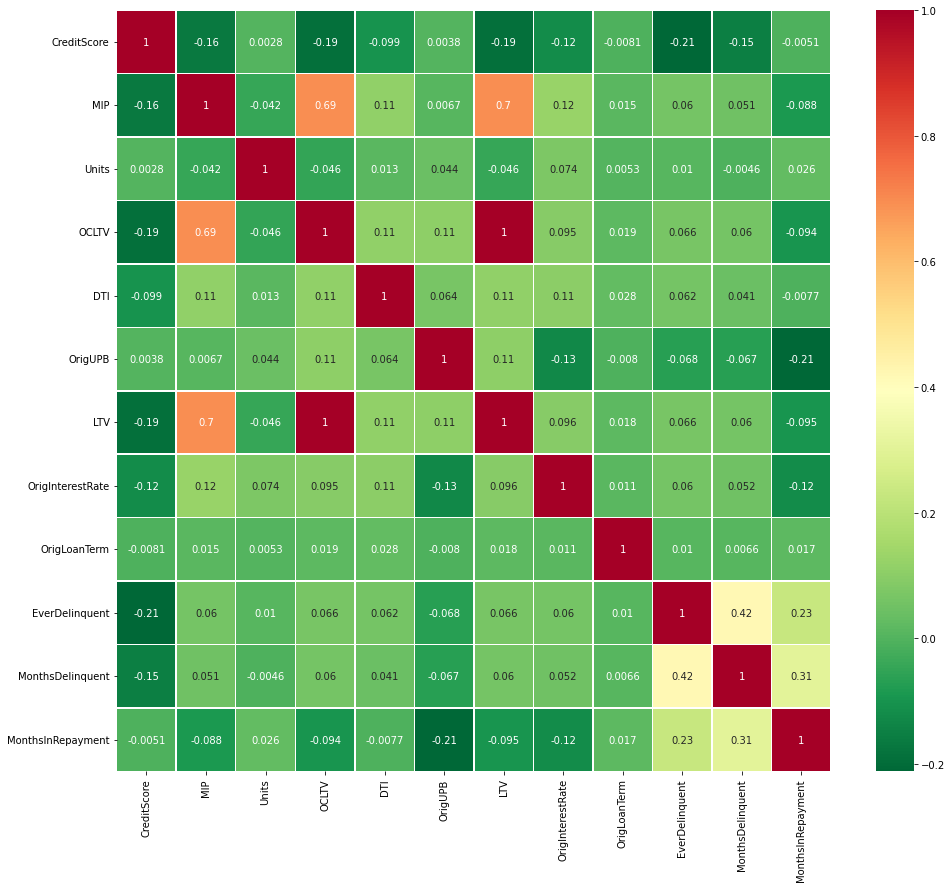

In [ ]:
# checking for correlation between the features
f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(df.corr(), cmap='RdYlGn_r', linewidths=0.5, annot =True)
plt.show()

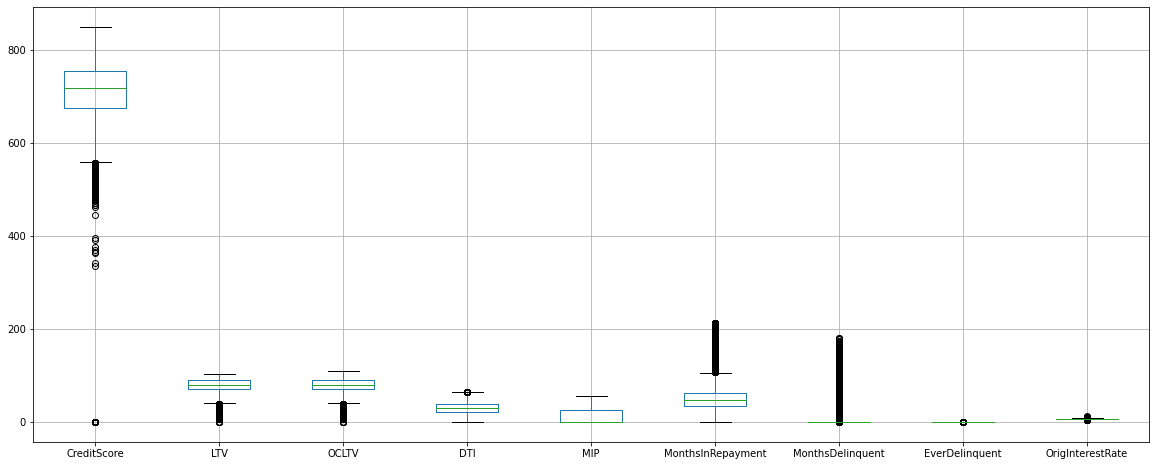

In [ ]:
# plotting boxplots for figuring out for outliers

plt.figure(figsize=(20,8))
df.boxplot(column = ['CreditScore','LTV','OCLTV','DTI','MIP','MonthsInRepayment','MonthsDelinquent','EverDelinquent','OrigInterestRate'])
plt.show()

# categorical Data Analysis

In [ ]:
# checking for categorical columns
cat= df.select_dtypes(include = 'object')

In [ ]:
# checking for insights of categorical columns
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   FirstTimeHomebuyer  291451 non-null  object
 1   MSA                 291451 non-null  object
 2   Occupancy           291451 non-null  object
 3   Channel             291451 non-null  object
 4   PPM                 291451 non-null  object
 5   ProductType         291451 non-null  object
 6   PropertyState       291451 non-null  object
 7   PropertyType        291451 non-null  object
 8   PostalCode          291451 non-null  object
 9   LoanSeqNum          291451 non-null  object
 10  LoanPurpose         291451 non-null  object
 11  NumBorrowers        291451 non-null  object
 12  SellerName          266457 non-null  object
 13  ServicerName        291451 non-null  object
dtypes: object(14)
memory usage: 31.1+ MB


In [ ]:
# checking for insights of categorical columns
cat.describe()

,FirstTimeHomebuyer,MSA,Occupancy,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,NumBorrowers,SellerName,ServicerName
count,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,266457,291451
unique,3,392,3,4,3,1,53,7,1767,291451,3,3,20,20
top,N,X,O,T,N,FRM,CA,SF,94500,F199Q1268030,P,2,Ot,Other servicers
freq,184154,39100,276131,167670,282125,291451,43327,244923,2582,1,123404,187335,76943,64043


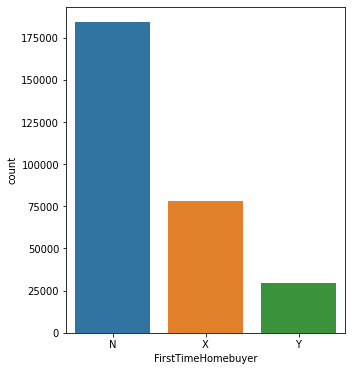

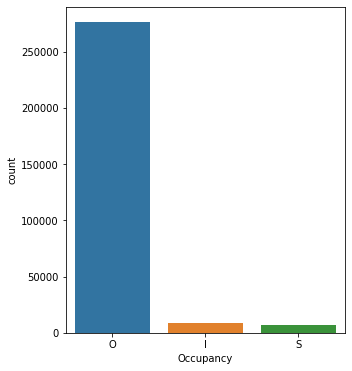

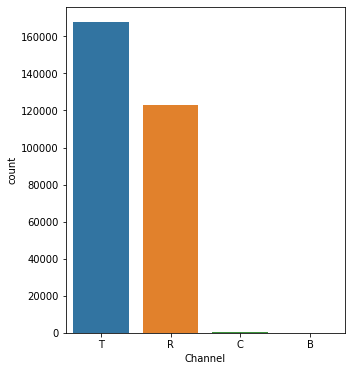

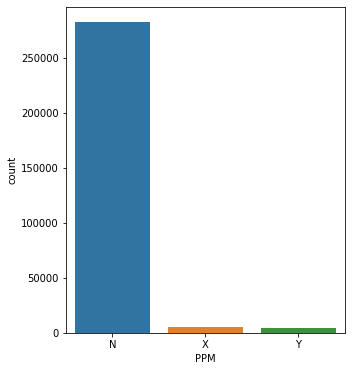

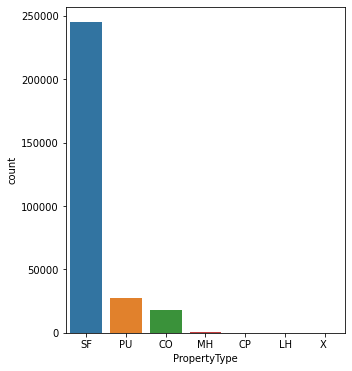

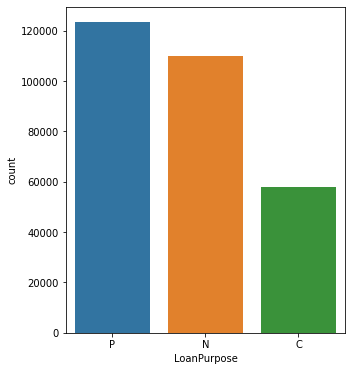

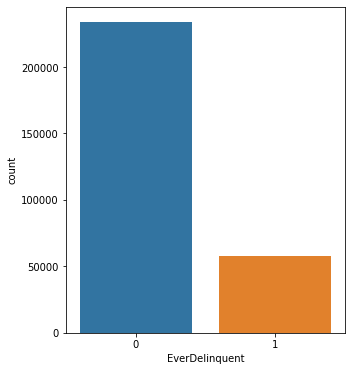

In [ ]:
# using chart bots 
cat=['FirstTimeHomebuyer','Occupancy','Channel','PPM','PropertyType','LoanPurpose','EverDelinquent']

for i in cat:
  plt.figure( figsize=(5, 6) )
  sns.countplot(df[i] )
  plt.show()

# Creating New Columns

In [ ]:
# Arranging Credit Score into range values and assigning labels 

count=(df['CreditScore'] == 0).sum()
print('count of zeros in the column of CreditScore:', count)
print('Mean of the CreditScore :', (df['CreditScore'].mean()))

# replacing the record '0'  with '850'
df['CreditScore'] = df['CreditScore'].replace(0,708)

count of zeros in the column of CreditScore: 1189
Mean of the CreditScore : 708.9369911237224


In [ ]:
# creating a new column 'creditrange'
df['CreditRange'] = pd.cut(df['CreditScore'], bins = [ 0, 650, 700, 750, 900 ], labels = ['poor', 'fair', 'good', 'excellent'])

In [ ]:
# Creating a new column 'LTVRange'
df['LTVRange'] = pd.cut(df['LTV'], bins = [ 0, 25, 50, 100 ], labels = ['low', 'medium', 'high'])

In [ ]:
# Creating a new column 'LoanTenure'
df['RepayRange'] = pd.cut(df['MonthsInRepayment'], bins = [ 0, 48, 96, 144, 192, 240 ], labels = ['0-4yrs', '4-8yrs', '8-12yrs', '12-16yrs', '16-20yrs'])

In [ ]:
df['LoanTenure'] = (df['MaturityDate'] - df['FirstPaymentDate']).dt.days
df = df.astype({"LoanTenure": np.float})
df['LoanTenure'] = df['LoanTenure'].div(365)

In [ ]:
# Removed X values from FirstTimeHomeBuyer column
df = df[df.FirstTimeHomebuyer != 'X']
df.rename(columns={'FirstTimeHomebuyer':'Homebuyer'},inplace=True)

# Feature Engineering

In [ ]:
# checking dataset features for Feature Engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213436 entries, 0 to 291450
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CreditScore        213436 non-null  int64         
 1   FirstPaymentDate   213436 non-null  datetime64[ns]
 2   Homebuyer          213436 non-null  object        
 3   MaturityDate       213436 non-null  datetime64[ns]
 4   MSA                213436 non-null  object        
 5   MIP                213436 non-null  int64         
 6   Units              213436 non-null  int64         
 7   Occupancy          213436 non-null  object        
 8   OCLTV              213436 non-null  int64         
 9   DTI                213436 non-null  int64         
 10  OrigUPB            213436 non-null  int64         
 11  LTV                213436 non-null  int64         
 12  OrigInterestRate   213436 non-null  float64       
 13  Channel            213436 non-null  object  

In [ ]:
# Dropping the feature 
df = df.drop(['FirstPaymentDate','MaturityDate','OCLTV','PropertyState','PropertyType','PostalCode','ProductType','LoanSeqNum','SellerName','ServicerName','MonthsDelinquent'],axis = 1)

In [ ]:
df.head(2)

,CreditScore,Homebuyer,MSA,MIP,Units,Occupancy,DTI,OrigUPB,LTV,OrigInterestRate,...,PPM,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsInRepayment,CreditRange,LTVRange,RepayRange,LoanTenure
0,708,N,16974,25,1,O,27,117000,89,6.75,...,N,P,360,2,0,52,good,high,4-8yrs,29.936986
1,708,N,19740,0,1,O,17,109000,73,6.50,...,N,N,360,1,0,144,good,high,8-12yrs,29.936986


In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
# Encoding categorical columns

df['Homebuyer'] = le.fit_transform(df['Homebuyer'])
df['CreditRange'] = le.fit_transform(df['CreditRange'])
df['RepayRange'] = le.fit_transform(df['RepayRange'])
df['LTVRange'] = le.fit_transform(df['LTVRange'])

In [ ]:
# Spliting the data set setting the Target Variable

X=df.drop(["EverDelinquent"],axis=1)
y=df['EverDelinquent']

#Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == int


In [ ]:
# Calculating MI scores for data set Features

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores,name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

CreditRange          0.040446
CreditScore          0.035267
Units                0.034806
OrigLoanTerm         0.034256
MonthsInRepayment    0.030828
RepayRange           0.030483
Channel              0.008035
LoanTenure           0.007296
NumBorrowers         0.006625
OrigInterestRate     0.006159
LoanPurpose          0.005995
MIP                  0.005862
LTV                  0.005555
MSA                  0.005222
DTI                  0.003104
OrigUPB              0.002534
Occupancy            0.000669
PPM                  0.000472
LTVRange             0.000430
Homebuyer            0.000415
Name: MI Scores, dtype: float64

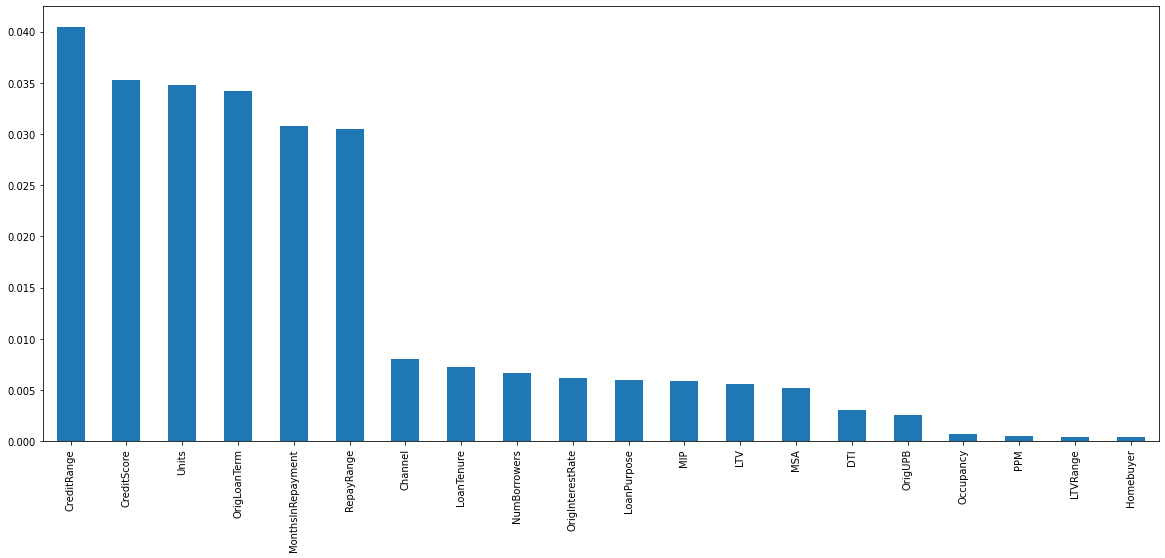

In [ ]:
# checking MI score
mi_scores.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
# implementing statistical method to select independent features which have strong relationship with dependent feature.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X,y)
dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscore],axis=1)
featureScores.columns =['Specs', 'Score']

In [ ]:
featureScores

,Specs,Score
0,CreditScore,5.358081e+04
1,Homebuyer,4.973148e+00
2,MSA,1.930419e+02
3,MIP,1.552051e+04
4,Units,6.685963e-01
5,Occupancy,2.222850e+00
6,DTI,2.017332e+03
7,OrigUPB,2.057233e+07
8,LTV,3.223347e+03
9,OrigInterestRate,1.366548e+01


In [ ]:
# This method also helps in finding importance of each independent with the dependent feature

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

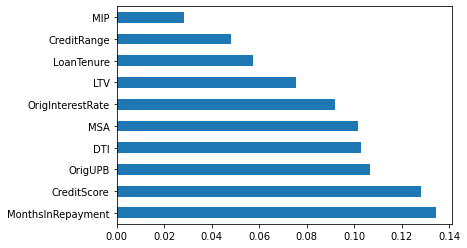

In [ ]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [ ]:
# Dropping Less important Features
df = df.drop(['CreditScore','MSA','Occupancy','Channel','PPM','LoanPurpose','NumBorrowers'],axis = 1)


In [ ]:
# Removing features with 0 variance

from sklearn.feature_selection import VarianceThreshold
varselector=VarianceThreshold(threshold=0)
varselector.fit(df)
print("Earlier shape of data: ",df.shape)
print("shape after transformation: ",varselector.transform(df).shape)

Earlier shape of data:  (213436, 14)
shape after transformation:  (213436, 14)


In [ ]:
# splitting Dataset into Train and Test Data

from sklearn.model_selection import train_test_split  
X=df.drop(["EverDelinquent"],axis=1)
y=df['EverDelinquent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)  

In [ ]:
# checking shape of the data
print("Before Over Sampling shape of X_train :" ,X_train.shape)
print("Before Over Sampling shape of y_train :" ,y_train.shape)
print("Before Over Sampling shape of X_test :" ,X_test.shape)
print("Before Over Sampling shape of y_test :" ,y_test.shape)

Before Over Sampling shape of X_train : (170748, 13)
Before Over Sampling shape of y_train : (170748,)
Before Over Sampling shape of X_test : (42688, 13)
Before Over Sampling shape of y_test : (42688,)


In [ ]:
#Applying SMOTE for handling imbalance data
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
x_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)
x_test_sm,y_test_sm = smote.fit_resample(X_test,y_test)

In [ ]:
print("After Implementing Smote shape of X_train :", x_train_sm.shape)
print("After Implementing Smote shape of y_train :",y_train_sm.shape)
print(" '1': {}".format(sum(y_train_sm == 1)))  
print(" '0': {}".format(sum(y_train_sm == 0)))

After Implementing Smote shape of X_train : (274704, 13)
After Implementing Smote shape of y_train : (274704,)
 '1': 137352
 '0': 137352


In [ ]:
print("After Implementing Smote shape of X_test :", x_test_sm.shape)
print("After Implementing Smote shape of y_test :",y_test_sm.shape)
print(" '1': {}".format(sum(y_test_sm == 1)))  
print(" '0': {}".format(sum(y_test_sm == 0)))

After Implementing Smote shape of X_test : (68844, 13)
After Implementing Smote shape of y_test : (68844,)
 '1': 34422
 '0': 34422


In [ ]:
#Normalizing data by rescaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_sm,x_test_sm)
X_train_scl = scaler.transform(x_train_sm)
X_test_scl = scaler.transform(x_test_sm)

# PCA Implementation

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)

In [ ]:
pca_features = pca.fit_transform(X_train_scl)

In [ ]:
x_train_sm.shape

(274704, 13)

In [ ]:
pca_features.shape

(274704, 8)

Text(0, 0.5, 'second principal component')

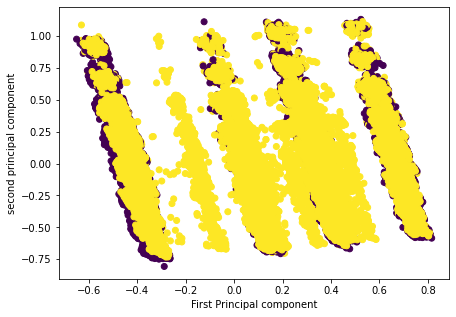

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(pca_features[:,0],pca_features[:,1], c=[y_train_sm])
plt.xlabel('First Principal component')
plt.ylabel('second principal component')

In [ ]:
sum(pca.explained_variance_ratio_)*100

98.4245786253299

Text(0.5, 0, 'Principal Components')

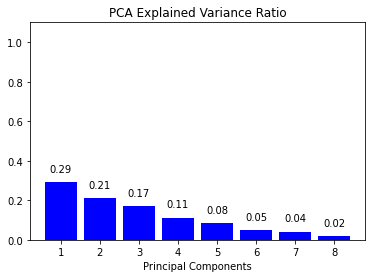

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.bar(
    x = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_, 
    color= "blue"
)
 
for x, y in zip(np.arange(len(df.columns)) + 1, 
                pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
 
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('PCA Explained Variance Ratio')
ax.set_xlabel('Principal Components')

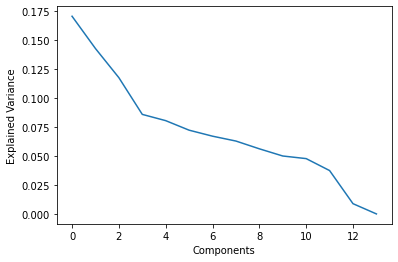

In [ ]:
# You must normalize the data before applying the fit method
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df.columns)
#print(loadings)

import matplotlib.pyplot as plot
plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

# Applying Random Forest Classifier Model

In [ ]:
#pca = PCA(n_components = 8)
#train_features = pca.fit_transform(X_train_sclsmt)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier(max_samples = 0.75, random_state=42)
rfc.fit(X_train_scl,y_train_sm)

RandomForestClassifier(max_samples=0.75, random_state=42)

In [ ]:
# Applying RandomForest Classifier on Test Data
y_pred = rfc.predict(X_test_scl)

In [ ]:
# Checking for Accuracy of the Test Data

from sklearn import metrics
print("Accuracy %:",metrics.accuracy_score(y_test_sm, y_pred)*100)

Accuracy %: 84.60287025739352


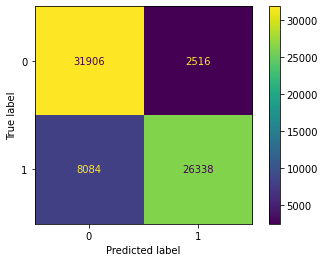

In [ ]:
# Checking out for the Confusion Matrix

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(rfc,X_test_scl,y_test_sm)


In [ ]:
# checking for the performance of RandomForestClassifier through Roc_curve,AUC
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate, thresholds =roc_curve(y_test_sm,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8460287025739353

In [ ]:
# Priniting Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     34422
           1       0.91      0.77      0.83     34422

    accuracy                           0.85     68844
   macro avg       0.86      0.85      0.85     68844
weighted avg       0.86      0.85      0.85     68844



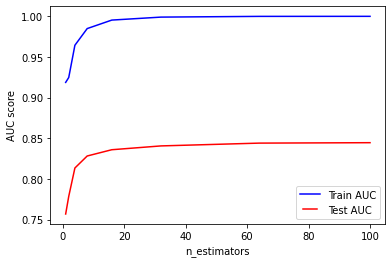

In [ ]:
# checking at the output of Test and Train of RandonForestClassifier
n_estimators = [1,2,4,8,16,32,64,100]
train_results = []
test_results = []

for estimator in n_estimators:
  rf= RandomForestClassifier(n_estimators = estimator, n_jobs=-1)
  rf.fit(X_train_scl,y_train_sm)
  
  train_pred = rf.predict(X_train_scl)
  false_positive_rate,true_positive_rate, thresholds = roc_curve(y_train_sm,train_pred)
  
  roc_auc = auc(false_positive_rate,true_positive_rate)
  train_results.append(roc_auc)
  
  y_pred = rf.predict(X_test_scl)
  false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test_sm,y_pred)

  roc_auc = auc(false_positive_rate,true_positive_rate)
  test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b" , label = "Train AUC" )
line1, = plt.plot(n_estimators, test_results, "r" , label = "Test AUC" )
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

Applying Hyperparametric Tuning

In [ ]:
# Checking at the default parameters used in RandomForestClassifier
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': 0.75, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# Defining new parameter for RandomForestClassifer for Hyperparameter Tuning
n_estimators =  [25, 50, 100, 100]
max_features = [0.2,0.6,1.0]
max_depth = [3, 6, None]
max_samples = [0.5,0.75,1.0]
min_samples_split =[2,5]
min_samples_leaf = [1,2]


In [ ]:
# setting the parameters for Hyperparameter Tuning
param_grid = { 'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'max_samples': max_samples,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

print(param_grid)

{'n_estimators': [25, 50, 100, 100], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [3, 6, None], 'max_samples': [0.5, 0.75, 1.0], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [ ]:
# Using RandomizedSearch for Hyperparamter tuning for RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

rfc_grid = RandomizedSearchCV(estimator= rfc,
                              param_distributions=param_grid,
                              cv=3,
                              verbose=2,
                              n_jobs = -1)

In [ ]:
# Fitting the grid parameter on Train data
rfc_grid.fit(X_train_scl,y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_samples=0.75,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [25, 50, 100, 100]},
                   verbose=2)

In [ ]:
# Fitting the grid parameter on Test data
y_pred_rfc_grid = rfc_grid.predict(X_test_scl)

In [ ]:
# checking for the Accuracy after implementing Hyperparameter Tuning
from sklearn import metrics
print("Accuracy %:",metrics.accuracy_score(y_test_sm, y_pred_rfc_grid)*100)

Accuracy %: 85.35674859101738


# By implementation of Hyperparameter tuning the Random Forest classfier Accuracy is 85%

# 2nd Model: Implementing SVC Model

In [ ]:
# Scaling the data for further process
scaler = MinMaxScaler()
scaler.fit(x_train_sm,x_test_sm)
X_train_scl = scaler.transform(x_train_sm)
X_test_scl = scaler.transform(x_test_sm)

In [ ]:
# rescaling the data for SVC model
from sklearn import preprocessing

X_train_svm = preprocessing.scale(X_train_scl)

X_test_svm = preprocessing.scale(X_test_scl)

In [ ]:
# Defining "Support vector classifier"
C=1
from sklearn.svm import SVC 
svc = SVC(C=C , cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=95, shrinking=True,
  tol=1, verbose=False)


In [ ]:
# Fitting the Svm model on Training Data
svc.fit(X_train_svm[:68844], y_train_sm[:68844])

SVC(C=1, decision_function_shape='ovo', gamma='auto', kernel='linear',
    random_state=95, tol=1)

In [ ]:
# Predicting the Test set results
y_pred_svm = svc.predict(X_test_svm[:68844])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test_sm[:68844],y_pred_svm[:68844],labels = [1,0])

array([[    0, 34422],
       [    0, 34422]])

In [ ]:
# checking for Accuracy of SVC model

from sklearn import metrics
print("Accuracy os SVC model % :",metrics.accuracy_score(y_test_sm[:68844],y_pred_svm[:68844])*100)
#print(f'Test Accuracy for svm: {svc.score(y_test_sm[:68844],y_pred_svm[:68844]) * 100:.2f}')

Accuracy os SVC model % : 50.0


Hyperparametric Tuning

In [ ]:
# Defining GridSearchCV for Hyperparameter Tuning on SVC model
from sklearn.model_selection import GridSearchCV

In [ ]:
# Defining grid parameters for Hyperparametric Tuning
parameters = [{'C':[1,10,100], 'kernel': ['linear'] ,'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}]
grid = GridSearchCV(estimator = svc,
                    param_grid = parameters,
                    refit=True, 
                    scoring = 'accuracy',
                    n_jobs = -1,
                    verbose=2)
grid = grid.fit(X_train_svm[:5000], y_train_sm[:5000])


Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [ ]:
# checking at the Accuracy of Training data 
accuracy = grid.best_score_

In [ ]:
accuracy

0.813

In [ ]:
# Getting the best parameters for Hyperparameter tuning
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
# Applying the Hyper parameters to the SVC model 
svc_grid = SVC(kernel = 'linear', gamma=0.1)
svc_grid.fit(X_train_svm[:5000], y_train_sm[:5000])

SVC(gamma=0.1, kernel='linear')

In [ ]:
# Applying the grid parameters on Test Data
y_pred_svm_grid = svc_grid.predict(X_test_svm[:5000])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_sm[:5000],y_pred_svm_grid[:5000],labels = [1,0])

array([[   0,  943],
       [   0, 4057]])

In [ ]:
# Checking for Accuracy after implementing Hyperparameter tuning
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test_sm[:5000], y_pred_svm[:5000])
accuracy

0.8114

# By implementing Hyperparameter tuning svc model got the accuracy of 81%

# Notes:
-- RandomForestClassifer gave the good accuracy score of 85% after implementing Hyperparameter tuning and it was able to train on entire dataset.
--SVC model gave a accuracy score of 81% after implementing hyperparameter tuning, and it was not possible to train on  entire data set,so trained on part of the dataset.
--Hence RandomForestClassifeir is the best suitable model for further process.